## Data loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data = pd.read_csv('/content/drive/Shareddrives/Project Management/data/Mob_hw_dont_use.csv')
# data.columns

## EDA

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346973 entries, 0 to 1346972
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   viajeros                1346973 non-null  int64  
 1   viajes                  1346973 non-null  int64  
 2   provincia_origen        1346973 non-null  int64  
 3   provincia_origen_name   1346973 non-null  object 
 4   provincia_destino       1346973 non-null  int64  
 5   provincia_destino_name  1346973 non-null  object 
 6   date                    1346973 non-null  object 
 7   holiday_type            42297 non-null    object 
 8   is_holiday              1346973 non-null  int64  
 9   temp                    1346973 non-null  float64
 10  cloudcover              1346973 non-null  float64
 11  precip                  1346973 non-null  float64
 12  preciptype              508524 non-null   object 
 13  conditions              1346973 non-null  object 
dtypes:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346973 entries, 0 to 1346972
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   viajeros                1346973 non-null  int64  
 1   viajes                  1346973 non-null  int64  
 2   provincia_origen        1346973 non-null  int64  
 3   provincia_origen_name   1346973 non-null  object 
 4   provincia_destino       1346973 non-null  int64  
 5   provincia_destino_name  1346973 non-null  object 
 6   date                    1346973 non-null  object 
 7   holiday_type            42297 non-null    object 
 8   is_holiday              1346973 non-null  int64  
 9   temp                    1346973 non-null  float64
 10  cloudcover              1346973 non-null  float64
 11  precip                  1346973 non-null  float64
 12  preciptype              508524 non-null   object 
 13  conditions              1346973 non-null  object 
dtypes:

In [ ]:
data.describe()

,viajeros,viajes,provincia_origen,provincia_destino,is_holiday,temp,cloudcover,precip
count,1.346973e+06,1.346973e+06,1.346973e+06,1.346973e+06,1.346973e+06,1.346973e+06,1.346973e+06,1.346973e+06
mean,2.658803e+03,2.797006e+03,2.605791e+01,2.601847e+01,3.140152e-02,1.668958e+01,4.734761e+01,1.442065e+00
std,1.000579e+04,1.061836e+04,1.469970e+01,1.473268e+01,1.744004e-01,6.870815e+00,2.620791e+01,5.314776e+00
min,1.500000e+01,1.500000e+01,1.000000e+00,1.000000e+00,0.000000e+00,-4.100000e+00,0.000000e+00,0.000000e+00
25%,3.800000e+01,4.800000e+01,1.300000e+01,1.300000e+01,0.000000e+00,1.170000e+01,2.665000e+01,0.000000e+00
50%,1.270000e+02,1.430000e+02,2.600000e+01,2.600000e+01,0.000000e+00,1.690000e+01,4.842000e+01,0.000000e+00
75%,6.370000e+02,6.670000e+02,3.900000e+01,3.900000e+01,0.000000e+00,2.170000e+01,6.825000e+01,2.500000e-01
max,2.857590e+05,3.025830e+05,5.200000e+01,5.200000e+01,1.000000e+00,3.500000e+01,1.000000e+02,3.081520e+02


## Exploration and wrangling

In [ ]:
# province code to name dict
prov_dict = dict(zip(data['provincia_origen'], data['provincia_origen_name']))


In [ ]:
pdata = data.copy()

# Feature manipulation
pdata['date'] = pd.to_datetime(pdata['date'])

# Extract day, month, and year
pdata['day'] = pdata['date'].dt.day
pdata['month'] = pdata['date'].dt.month
pdata['year'] = pdata['date'].dt.year

# Weekend indicator
pdata['is_weekend'] = pdata['date'].dt.dayofweek.isin([5,6]).astype(int)

# Precipitation boolean integer
pdata['is_precip'] = (pdata['precip'] > 0).astype(int)

# dropping extra columns
pdata = pdata.drop(columns = ['date', 'viajeros', 'precip', 'cloudcover'])

# Label encoding categorical columns

# Dictionary to store the mappings for each column
label_encodings = {}

for col in ['holiday_type', 'preciptype', 'conditions']:
  le = LabelEncoder()
  pdata[col] = le.fit_transform(pdata[col])
  label_encodings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

pdata.head()

,viajes,provincia_origen,provincia_origen_name,provincia_destino,provincia_destino_name,holiday_type,is_holiday,temp,preciptype,conditions,day,month,year,is_weekend,is_precip
0,18981,2,Albacete,3,Alicante,2,0,23.6,3,2,1,9,2022,0,0
1,280,2,Albacete,4,Almería,2,0,23.6,3,2,1,9,2022,0,0
2,47,2,Albacete,6,Badajoz,2,0,23.6,3,2,1,9,2022,0,0
3,15,2,Albacete,7,"Balears, Illes",2,0,23.6,3,2,1,9,2022,0,0
4,77,2,Albacete,8,Barcelona,2,0,23.6,3,2,1,9,2022,0,0


In [ ]:
# pdata.to_csv('/content/drive/Shareddrives/Project Management/data/FInal_input.csv', index=False)

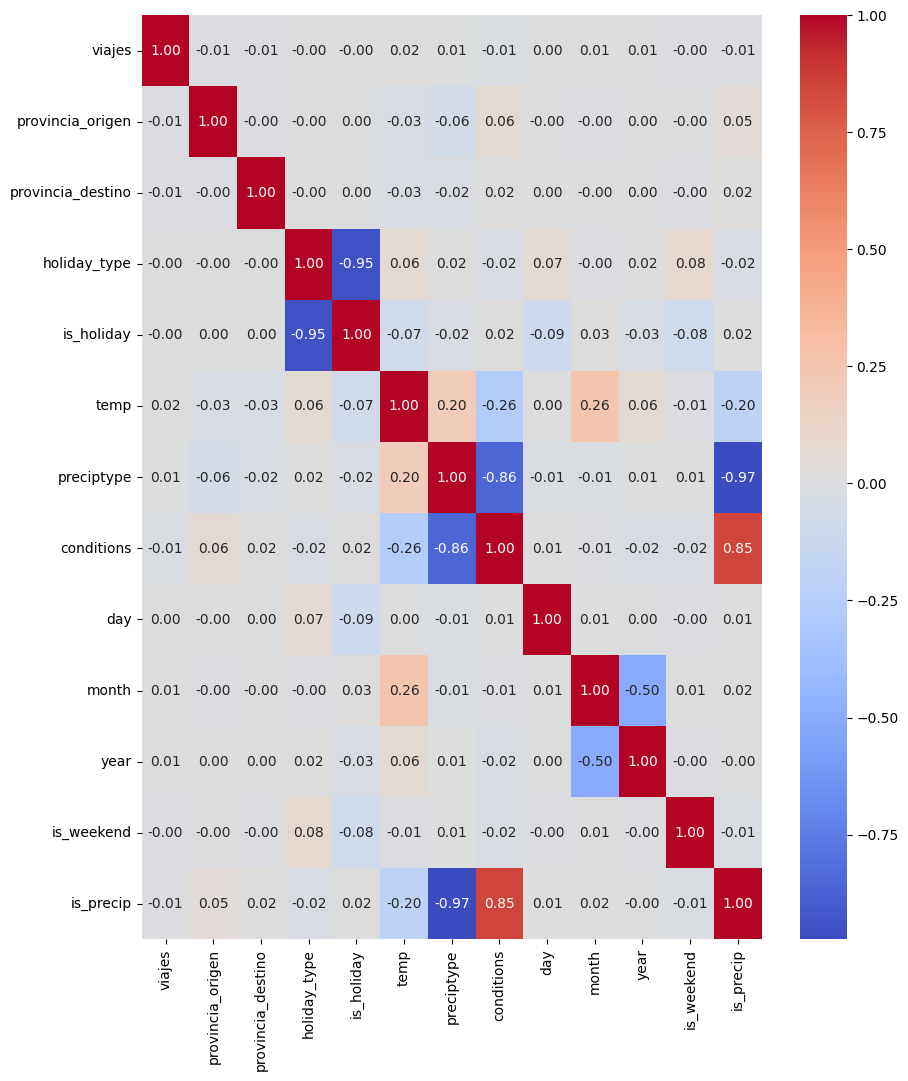

In [ ]:
dc = pdata.corr()
plt.figure(figsize=(10,12))
sns.heatmap(dc, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
pdata['pair'] = pdata.apply(lambda x: tuple(sorted([x['provincia_origen'], x['provincia_destino']])), axis=1)
top_pairs = pdata.groupby('pair')['viajes'].sum()
top_pairs = top_pairs.sort_values(ascending=False).head(20).index

print(top_pairs)


# 'provincia_origen_name', 'provincia_destino_name'

Index([                       ('Madrid', 'Toledo'),
                           ('Barcelona', 'Girona'),
                        ('Barcelona', 'Tarragona'),
                         ('Guadalajara', 'Madrid'),
                            ('Alicante', 'Murcia'),
       ('Castellón/Castelló', 'Valencia/Valéncia'),
                       ('Coruña, A', 'Pontevedra'),
                 ('Alicante', 'Valencia/Valéncia'),
                              ('Cádiz', 'Sevilla'),
                             ('Madrid', 'Segovia'),
                           ('Barcelona', 'Lleida'),
                             ('Huelva', 'Sevilla'),
                               ('Cádiz', 'Málaga'),
                             ('Granada', 'Málaga'),
                            ('Huesca', 'Zaragoza'),
                              ('Huesca', 'Lleida'),
                            ('Badajoz', 'Cáceres'),
                         ('Ciudad Real', 'Toledo'),
                          ('Bizkaia', 'Cantabria'),
            

## Models

### LightGBM

In [ ]:
pdata.columns

Index(['viajeros', 'viajes', 'provincia_origen', 'provincia_destino',
       'holiday_type', 'is_holiday', 'temp', 'cloudcover', 'precip',
       'preciptype', 'conditions', 'day', 'month', 'year', 'is_weekend'],
      dtype='object')

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

input = pdata.copy()

X = input.drop(columns=['viajes'])
y = input['viajes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tr_data = lgb.Dataset(X_train, label=y_train)
ts_data = lgb.Dataset(X_test, label=y_test, reference=tr_data)

params = {
    'objective': 'regression',   # For predicting continuous values
    'metric': 'rmse',           # Root Mean Squared Error
    'boosting_type': 'gbdt',    # Gradient Boosting Decision Trees
    'num_leaves': 31,           # Controls complexity of the model
    'learning_rate': 0.05,      # Step size
    'feature_fraction': 0.8,     # Fraction of features to consider at each split
    'early_stopping_round': 10  # Early stopping

}

model = lgb.train(params, tr_data, valid_sets=[tr_data, ts_data])

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.193647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 1077578, number of used features: 14
[LightGBM] [Info] Start training from score 2795.282822
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 1115.52	valid_1's rmse: 1159.57
RMSE: 1159.5721090994232


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
######    CODE FOR MAKING PREDICTIONS ON VIAJES     ######

from datetime import timedelta

# Get the last date in the dataset
last_date = input[['year', 'month', 'day']].drop_duplicates()
last_date = pd.to_datetime(last_date.assign(day=last_date['day'], month=last_date['month'], year=last_date['year']).iloc[-1])

# Generate dates for the next 3 months
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=90)

# Create a DataFrame for future data
future_data = pd.DataFrame({
    'day': future_dates.day,
    'month': future_dates.month,
    'year': future_dates.year
})

# Add other features
future_data['is_weekend'] = future_dates.weekday >= 5  # True if Saturday or Sunday
future_data['is_holiday'] = 0  # Replace with logic for identifying holidays
future_data['holiday_type'] = 'None'  # Replace with holiday types if available
future_data['temp'] = 20  # Replace with forecasted or average temperatures from colab API
future_data['precip'] = 0  # Replace with forecasted or average precipitation
future_data['preciptype'] = 'None'  # Replace with precipitation types if available
future_data['conditions'] = 'Clear'  # Replace with forecasted conditions
future_data['provincia_origen'] = 'Default_Origen'  # Replace with specific origin
future_data['provincia_destino'] = 'Default_Destino'  # Replace with specific destination



# Ensure columns match
future_data = future_data[X.columns]  # Ensure same order and columns

# Predict
future_data['viajes_predicted'] = model.predict(future_data)

# View predictions
print(future_data[['day', 'month', 'year', 'viajes_predicted']])


### LSTM (ignore)

#### Data prep

In [ ]:
input = pdata.copy()

# Separate features (X) and target (y)
X = input.drop(columns=['viajes']).values
y = input['viajes'].values

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create sequences
def create_sequences(features, target, sequence_length):
  X_seq, y_seq = [], []
  for i in range(sequence_length, len(features)):
    X_seq.append(features[i-sequence_length:i])
    y_seq.append(target[i])
  return np.array(X_seq), np.array(y_seq)

sequence_length = 5  # Use the last 10 timesteps for prediction
X_seq, y_seq = create_sequences(X_scaled, y, sequence_length)

# Split into train and test sets
split_index = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]



#### Model build

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential([
    LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Prevent overfitting
    # LSTM(16, return_sequences=False),
    # Dropout(0.2),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 32)               │           5,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5, 1)                │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,793 (22.63 KB)

 Trainable params: 5,793 (22.63 KB)

 Non-trainable params: 0 (0.00 B)

#### Model Train

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=512,
    verbose=1
)

Epoch 1/25
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - loss: 117922336.0000 - val_loss: 137782592.0000
Epoch 2/25
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - loss: 115060192.0000 - val_loss: 137405136.0000
Epoch 3/25
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 115032744.0000 - val_loss: 137039216.0000
Epoch 4/25
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - loss: 115047736.0000 - val_loss: 136682128.0000
Epoch 5/25
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - loss: 113637648.0000 - val_loss: 136334160.0000
Epoch 6/25
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 113239616.0000 - val_loss: 135994736.0000
Epoch 7/25
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - loss: 111882256.0000 - val_loss: 135663664.0000
Epoch 8/25
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - loss: 113321800.0000 - val_loss: 135341968.0000
Epoch 9/25
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - loss: 111932360.0000 - val_loss: 135027664.0000
Epoch 10/25
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 55s

#### Model Eval

In [ ]:
y_pred.shape

(269394, 5, 1)

In [ ]:
y_pred

array([[[1282.5077],
        [1610.0565],
        [1660.2603],
        [1667.1766],
        [1668.115 ]],

       [[1282.5077],
        [1610.0565],
        [1660.2603],
        [1667.1766],
        [1668.115 ]],

       [[1282.5077],
        [1610.0565],
        [1660.2603],
        [1667.1766],
        [1668.115 ]],

       ...,

       [[1282.5077],
        [1610.0565],
        [1660.2603],
        [1667.1766],
        [1668.115 ]],

       [[1282.5077],
        [1610.0565],
        [1660.2603],
        [1667.1766],
        [1668.115 ]],

       [[1282.5077],
        [1610.0565],
        [1660.2603],
        [1667.1766],
        [1668.115 ]]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict on test data
y_pred = model.predict(X_test)

# Rescale target variable (if needed) and evaluate
rmse = mean_squared_error(y_test, y_pred)
print(f'RMSE: {rmse}')

8419/8419 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


ValueError: Found array with dim 3. None expected <= 2.

#### Predictions and visualization

In [ ]:
# Use the last sequence from the training data
last_sequence = X_scaled[-sequence_length:]  # Shape: (sequence_length, num_features)

future_predictions = []

for _ in range(90):  # Predict for the next 90 days
    next_pred = model.predict(last_sequence[np.newaxis, :, :])[0, 0]  # Predict the next value
    future_predictions.append(next_pred)

    # Update the sequence with the new prediction
    next_input = np.append(last_sequence[1:], [[next_pred]], axis=0)
    last_sequence = next_input

# Rescale predictions back to original scale (if needed)
future_predictions = scaler.inverse_transform(future_predictions)


import matplotlib.pyplot as plt

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(range(len(y)), y, label='Original Data')  # Full original data
plt.plot(range(len(y), len(y) + 90), future_predictions, label='Future Predictions')  # Future
plt.legend()
plt.show()